In [2]:
import tensorflow as tf 
from sklearn.datasets import load_breast_cancer

In [11]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [12]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
data.data.shape

(569, 30)

In [14]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Split the data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = x_train.shape
print(N,D)

381 30


# Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(D),
    tf.keras.layers.Dense(units=1, activation='sigmoid')       
])

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
results = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 53ms/step - loss: 0.8454 - accuracy: 0.4430 - val_loss: 0.8368 - val_accuracy: 0.4415
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.7802 - accuracy: 0.5077 - val_loss: 0.7572 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 0s 16ms/step - loss: 0.7120 - accuracy: 0.5480 - val_loss: 0.6880 - val_accuracy: 0.5691
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.6379 - accuracy: 0.6085 - val_loss: 0.6295 - val_accuracy: 0.6596
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 0.5926 - accuracy: 0.6962 - val_loss: 0.5784 - val_accuracy: 0.6915
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 0.5413 - accuracy: 0.7432 - val_loss: 0.5356 - val_accuracy: 0.7713
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.4759 - accuracy: 0.8351 - val_loss: 0.4993 - val_accuracy: 0.7979
Epoch 

# Plotting the results

In [25]:
import matplotlib.pyplot as plt

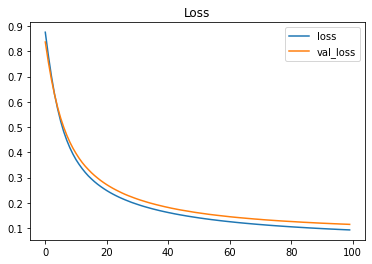

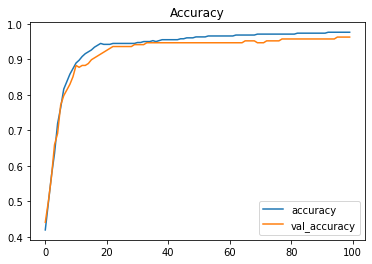

In [28]:
plt.figure(0)
plt.title('Loss')
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.figure(1)
plt.title('Accuracy')
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Test the model

In [32]:
test = model.evaluate(x=x_test, y=y_test)
print('Test score: ', test[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9628
Test score:  0.9627659320831299


# Making predictions

In [38]:
pred = model.predict(x_test)
pred

array([[5.74516866e-12],
       [6.28961623e-02],
       [8.53613734e-01],
       [9.48000968e-01],
       [9.29169774e-01],
       [8.69788527e-02],
       [9.88964677e-01],
       [9.79951024e-01],
       [9.79839206e-01],
       [9.87538517e-01],
       [9.89062488e-01],
       [3.53914499e-03],
       [9.97803986e-01],
       [8.92862678e-01],
       [8.39170694e-01],
       [7.61285722e-02],
       [9.84673142e-01],
       [9.70024467e-01],
       [1.97281241e-01],
       [2.20775604e-04],
       [9.93553162e-01],
       [9.15955126e-01],
       [9.99706626e-01],
       [1.05975360e-01],
       [5.12868702e-01],
       [8.07608783e-01],
       [9.97361064e-01],
       [9.99586940e-01],
       [1.34031177e-02],
       [9.89862502e-01],
       [9.66057777e-01],
       [9.82035875e-01],
       [9.57861662e-01],
       [4.09229551e-06],
       [9.76749361e-01],
       [9.99264956e-01],
       [9.94013429e-01],
       [9.79764700e-01],
       [1.09129542e-05],
       [1.81156397e-03],


In [39]:
import numpy as np
pred = np.round(pred).flatten()
print(pred)

[0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
